## Figure 8

In [7]:
##loading TiRP utility functions:
source("../utils.R")

In [13]:
path_to_results <- "/Users/klagattu/Documents/GitHub/TiRP/results"

In [14]:
mdata = readRDS(paste(path_to_results, "TiRP_scoring/thornton2019_TiRP.rds", sep="/"))
mdata$total_score = mdata$length_score + mdata$vgene_score + mdata$pos4_score + mdata$Jseq_score + mdata$pos.6_score + mdata$perc_score + mdata$pos_score
mdata$species = "mouse"

In [15]:
mtr = mdata[mdata$cell_type!="Tmemory",]
mtr = mtr[mtr$Helios %in% c("positive", "negative", "no Tregs"),]
mtr$Helios = as.character(mtr$Helios)
mtr$Helios[mtr$Helios=="positive"] = "Helios+"
mtr$Helios[mtr$Helios=="negative"] = "Helios-"
mtr$cell_type[mtr$cell_type=="Treg"] = paste(mtr$Helios[mtr$cell_type=="Treg"], mtr$cell_type[mtr$cell_type=="Treg"])

mtr$midscore = mtr$perc_score + mtr$pos_score + mtr$length_score 
mtr$vregscore = mtr$vgene_score + mtr$pos4_score
mtr$jregscore = mtr$Jseq_score + mtr$pos.6_score
mtr$allpos_score = mtr$pos.6_score + mtr$pos4_score + mtr$pos_score

In [25]:
mtr$sdz_total = (mtr$total_score - (-0.03285665))/0.2364265
mtr$sdz_mr = (mtr$midscore - 0.03846178)/0.2364265
mtr$sdz_vr = (mtr$vregscore - (-0.1459054))/0.2364265
mtr$ssdz_jr = mtr$jregscore/0.2364265
mstats = mtr %>% group_by(cell_type) %>% dplyr::summarise(mean_total_score = mean(sdz_total), SE_total_score = sd(sdz_total)/length(sdz_total), mean_mid_score = mean(sdz_mr), SE_mid_score = sd(sdz_mr)/length(sdz_mr), mean_vreg_score = mean(sdz_vr), SE_vreg_score = sd(sdz_vr)/length(sdz_vr),  mean_jreg_score = mean(ssdz_jr), SE_jreg_score = sd(ssdz_jr)/length(ssdz_jr)) 
mstats$mean_total_score = mstats$mean_total_score - mstats$mean_total_score[mstats$cell_type=="Tnaive"]
mstats$mean_mid_score = mstats$mean_mid_score - mstats$mean_mid_score[mstats$cell_type=="Tnaive"]
mstats$mean_vreg_score = mstats$mean_vreg_score - mstats$mean_vreg_score[mstats$cell_type=="Tnaive"]
mstats$mean_jreg_score = mstats$mean_jreg_score - mstats$mean_jreg_score[mstats$cell_type=="Tnaive"]


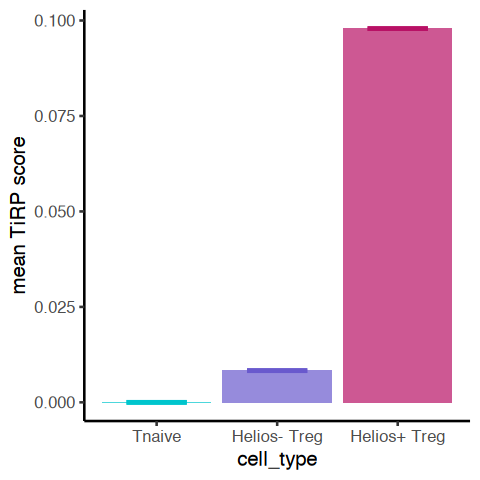

In [26]:
mstats$cell_type = factor(mstats$cell_type, levels=c("Tnaive", "Helios- Treg", "Helios+ Treg"))
g = ggplot(mstats, aes(cell_type, mean_total_score, fill=cell_type))
g = g + geom_bar(stat="identity", alpha=0.7, show.legend=FALSE) + geom_errorbar(aes(ymin=mean_total_score - SE_total_score, ymax = mean_total_score + SE_total_score, color=cell_type), width=0.5, size=1, show.legend = FALSE) + theme_classic(base_size=12) + scale_fill_manual(values=c("turquoise3", "slateblue3", "#b81165")) + scale_color_manual(values=c("turquoise3", "slateblue3", "#b81165"))
g + ylab("mean TiRP score")


In [18]:
m1 = mtr[mtr$cell_type!="Helios+ Treg",]
m2 = mtr[mtr$cell_type!="Tnaive",]

In [2]:
hdata <- readRDS(paste(path_to_results, "TiRP_scoring/gt2017_TiRP.rds", sep="/"))

In [3]:
hdata = hdata[hdata$donor %in% c("HD1", "HD2", "T1D6"),]

In [4]:
hdata = hdata[hdata$cell_type!="Treg",]
hdata$total_score = hdata$length_score + hdata$vgene_score + hdata$pos4_score + hdata$Jseq_score + hdata$pos.6_score + hdata$perc_score + hdata$pos_score
hdata$species = "human"
hdata$celltype = as.character(hdata$cell_type)
hdata$celltype[hdata$cell_type=="TN"] = "Tnaive"
hdata$celltype[hdata$cell_type=="Tscm"] = "Tmemory"
hdata$celltype[hdata$cell_type=="CM"] = "Tmemory"
hdata$allpos_score = hdata$pos.6_score + hdata$pos4_score + hdata$pos_score
hdata$midscore = hdata$perc_score + hdata$pos_score + hdata$length_score
hdata$vregscore = hdata$vgene_score + hdata$pos4_score
hdata$jregscore = hdata$Jseq_score + hdata$pos.6_score

In [5]:
hdata$sdz_total = (hdata$total_score - (-0.03285665))/0.2364265
hdata$sdz_mr = (hdata$midscore - 0.03846178)/0.2364265
hdata$sdz_vr = (hdata$vregscore - (-0.1459054))/0.2364265
hdata$ssdz_jr = hdata$jregscore/0.2364265

In [27]:
hdata$celltype = factor(hdata$celltype, levels=c("Tnaive", "Tmemory"))

hstats = hdata %>% group_by(celltype) %>% dplyr::summarise(mean_total_score = mean(sdz_total), SE_total_score = sd(sdz_total)/length(sdz_total), mean_mid_score = mean(sdz_mr), SE_mid_score = sd(sdz_mr)/length(sdz_mr), mean_vreg_score = mean(sdz_vr), SE_vreg_score = sd(sdz_vr)/length(sdz_vr),  mean_jreg_score = mean(ssdz_jr), SE_jreg_score = sd(ssdz_jr)/length(ssdz_jr)) 
hstats$mean_total_score = hstats$mean_total_score - hstats$mean_total_score[hstats$celltype=="Tnaive"]
hstats$mean_mid_score = hstats$mean_mid_score - hstats$mean_mid_score[hstats$celltype=="Tnaive"]
hstats$mean_vreg_score = hstats$mean_vreg_score - hstats$mean_vreg_score[hstats$celltype=="Tnaive"]
hstats$mean_jreg_score = hstats$mean_jreg_score - hstats$mean_jreg_score[hstats$celltype=="Tnaive"]

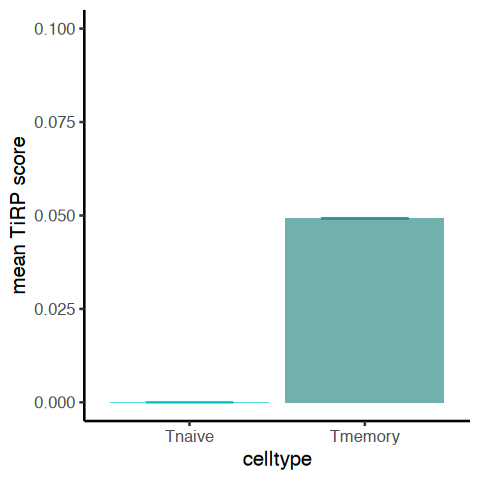

In [28]:
options(repr.plot.height=4, repr.plot.width=4)
hstats$celltype = factor(hstats$celltype, levels=c("Tnaive", "Tmemory"))
g = ggplot(hstats[hstats$celltype!="Treg",], aes(celltype, mean_total_score, fill=celltype))
g = g + geom_bar(stat="identity", alpha=0.7, show.legend = FALSE) + geom_errorbar(aes(ymin=mean_total_score - SE_total_score, ymax = mean_total_score + SE_total_score, color=celltype), width=0.5, show.legend = FALSE) + theme_classic(base_size=12) + scale_fill_manual(values=c("turquoise3", "#338f89")) + scale_color_manual(values=c("turquoise3", "#338f89"))
g + ylab("mean TiRP score") + ylim(0, 0.1)

In [32]:
mdatalong = data.frame(score_type = c(rep("total", nrow(mstats)), rep("mid", nrow(mstats)), rep("vreg", nrow(mstats)), rep("jreg", nrow(mstats))), celltype = rep(mstats$cell_type, 4), mean_score = c(mstats$mean_total_score, mstats$mean_mid_score, mstats$mean_vreg_score, mstats$mean_jreg_score), SE_score = c(mstats$SE_total_score, mstats$SE_mid_score, mstats$SE_vreg_score, mstats$SE_jreg_score))
mdatalong = rbind(mdatalong[mdatalong$score_type!="total",], mdatalong[mdatalong$score_type=="total",])
mdatalong$celltype = factor(mdatalong$celltype, levels=c("Tnaive", "Helios- Treg", "Helios+ Treg"))


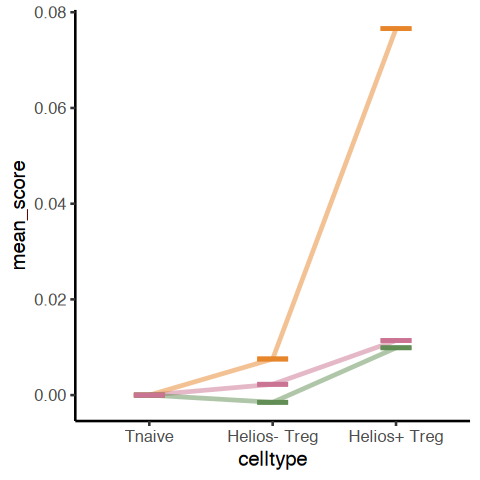

In [33]:
g = ggplot(mdatalong[mdatalong$score_type!="total",], aes(celltype, mean_score, color=score_type, group=score_type))
g = g + theme_classic(base_size=12) + geom_line(aes(group=score_type), alpha=0.5, size=1, show.legend = FALSE) + geom_errorbar(aes(ymin=mean_score - SE_score, ymax = mean_score + SE_score), width=0.25, size=1, show.legend = FALSE) ##+ scale_size_manual(values=c(2, 0.5))
g + scale_color_manual(values=c("#cb7392", "#e7852b", "#628d55")) 

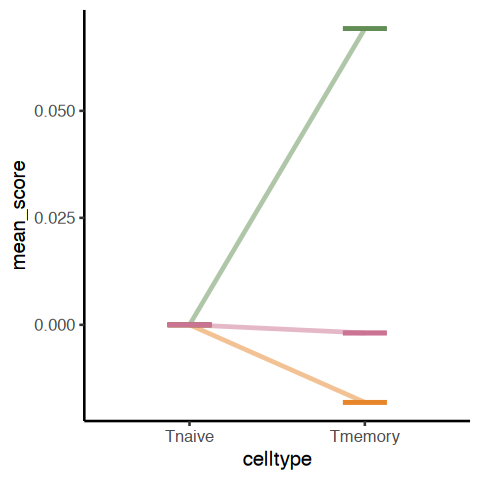

In [34]:
hdatalong = data.frame(score_type = c(rep("total", nrow(hstats)), rep("mid", nrow(hstats)), rep("vreg", nrow(hstats)), rep("jreg", nrow(hstats))), celltype = rep(hstats$celltype, 4), mean_score = c(hstats$mean_total_score, hstats$mean_mid_score, hstats$mean_vreg_score, hstats$mean_jreg_score), SE_score = c(hstats$SE_total_score, hstats$SE_mid_score, hstats$SE_vreg_score, hstats$SE_jreg_score))
hdatalong$celltype = factor(hdatalong$celltype, levels=c("Tnaive", "Tmemory", "Treg"))
hdatalong$sz = ifelse(hdatalong$score_type=="total", "lg", "sm")
hdatalong = rbind(hdatalong[hdatalong$score_type!="total",], hdatalong[hdatalong$score_type=="total",])
g = ggplot(hdatalong[hdatalong$score_type!="total" & hdatalong$celltype!="Treg",], aes(celltype, mean_score, color=score_type, group=score_type))
g = g + theme_classic(base_size=12) + geom_line(aes(group=score_type), alpha=0.5, size=1, show.legend = FALSE) + geom_errorbar(aes(ymin=mean_score - SE_score, ymax = mean_score + SE_score), width=0.25, size=1, show.legend = FALSE) ##+ scale_size_manual(values=c(2, 0.5))
g + scale_color_manual(values=c("#cb7392","#e7852b","#628d55")) 